# TRAFFIC SIGN CLASSIFICATION


## IMPORT LIBRARIES/DATASETS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

### PICKLE FILE INFORMATION:

A P file is a pickle file created by pickle, a Python module used for converting Python objects to a byte representation for storage on disk or transfer over a network. It allows for objects to be conveniently stored or transmitted without first having to convert the data to another format. P files can be "unpickled" and loaded back into program memory during runtime.

In [2]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']

In [4]:
X_train.shape
# IT MEANS WE HAVE 34799 IMAGES
# OF 32 X 32 PIXEL
# OF RGB FORMAT

(34799, 32, 32, 3)

In [5]:
y_train.shape
# Y IS JUST A VECTOR/ COLUMN WITH 34799 ENTRIES
# EACH ENTRY REPRESENTING THE NAME OF THE TRAFFIC SIGN IN THE IMAGE

(34799,)

In [6]:
# NOW WE WILL CHECK THE VALIDATION SET
X_val, y_val = valid['features'], valid['labels']

In [7]:
X_val.shape
# VALIDATION SET HAVE 4410 IMAGES

(4410, 32, 32, 3)

In [8]:
y_val.shape

(4410,)

In [9]:
X_test, y_test = test['features'], test['labels']

In [10]:
X_test.shape
# TEST DATASET HAVE 12630 ENTRIES/ PICTURES

(12630, 32, 32, 3)

In [11]:
y_test.shape

(12630,)

### INFORMATION ON LABEL CLASSES
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons


## IMAGES VISUALIZATION

5

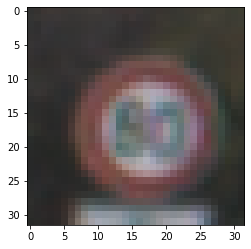

In [12]:
# SELECT A RANDOM NUMER BETWEEN 1 - NUMBER OF IMAGES IN TRAI SET
# IT IS TO JUST CHECK IF OUR DATASET IS CORRECT
i = np.random.randint(1, len(X_train))
# DISPLAY THE IMAGE AT i INDEX NUMBER
plt.imshow(X_train[i])
# ALSO SHOW THE LABEL GIVEN ALONG WITH IT
# THE NUMBER WILL CORRESPOND TO A SIGN IN THE LIST GIVEN ABOVE
y_train[i]

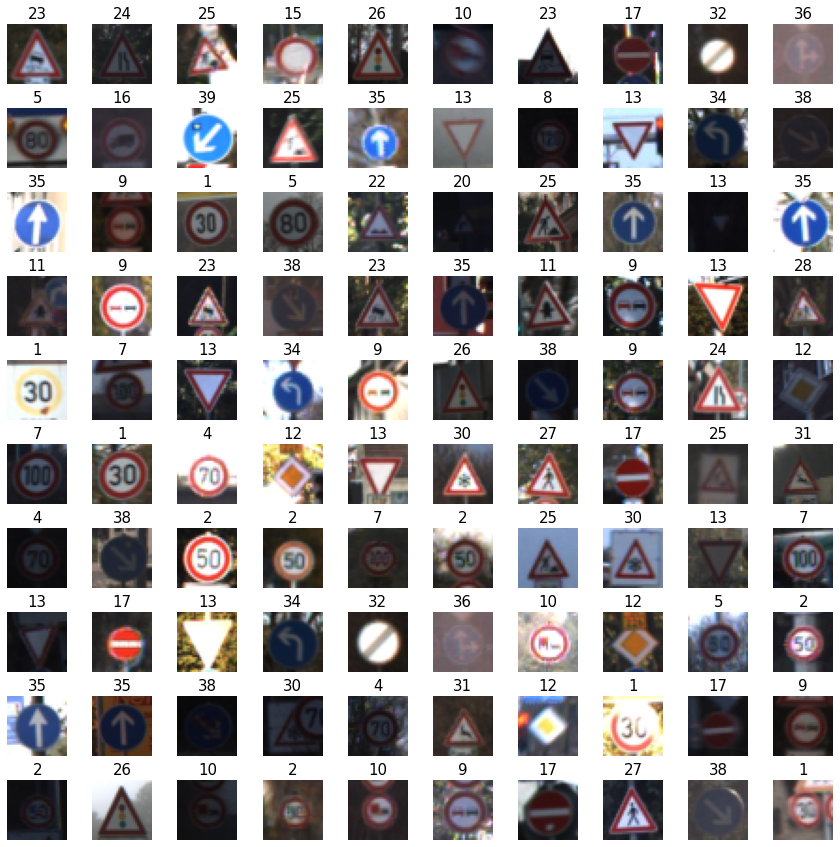

In [13]:
# TO VIEW MORE NUMBER OF IMAGES
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))

axes = axes.ravel() # flaten the 10 x 10 matrix into 100 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0,W_grid * L_grid):
    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off') # NOT SHOW THE PIXEL VALUES ON X AND Y AXIS
    
plt.subplots_adjust(hspace = 0.4)

        


## CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [14]:
# IMPORT THE SHUFLE FROM SKLEARN
# TO SHUFFLE OUR TRAIN DATASET
# IT PREVENTS OUR NEURAL NETWORK 
# FROM LEARNING THE ORDER OF THE IMAGES
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_val, y_val = shuffle(X_val, y_val)
X_test, y_test = shuffle(X_test, y_test)

In [15]:
# CONVERTING OUR IMAGES TO GRAYSCALE
# BASICALLY WE DIVIDE OUR DATASET BY 3
# IT MEANS WE GETTING THE AVERAGE OF ALL THREE RGB COLORS
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_val_gray = np.sum(X_val/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)

In [16]:
X_train_gray.shape

(34799, 32, 32, 1)

In [17]:
# NORMALIZE THESE GRAYSCALE IMAGES
X_train_gray_nor = (X_train_gray - 128) / 128
X_val_gray_nor = (X_val_gray - 128) / 128
X_test_gray_nor = (X_test_gray - 128) / 128

In [18]:
X_train_gray_nor

array([[[[ 0.984375  ],
         [ 0.98958333],
         [ 0.9921875 ],
         ...,
         [-0.81510417],
         [-0.80208333],
         [-0.79947917]],

        [[ 0.80208333],
         [ 0.9453125 ],
         [ 0.9921875 ],
         ...,
         [-0.8125    ],
         [-0.80729167],
         [-0.8046875 ]],

        [[ 0.0625    ],
         [ 0.83854167],
         [ 0.9921875 ],
         ...,
         [-0.80729167],
         [-0.8046875 ],
         [-0.796875  ]],

        ...,

        [[ 0.9921875 ],
         [ 0.84375   ],
         [ 0.52083333],
         ...,
         [-0.71875   ],
         [-0.73958333],
         [-0.83333333]],

        [[ 0.91666667],
         [ 0.640625  ],
         [ 0.60677083],
         ...,
         [-0.73177083],
         [-0.72916667],
         [-0.8359375 ]],

        [[ 0.6953125 ],
         [ 0.7734375 ],
         [ 0.87760417],
         ...,
         [-0.7265625 ],
         [-0.7265625 ],
         [-0.83854167]]],


       [[[-0.640625  ],


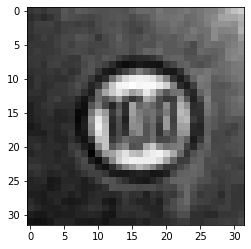

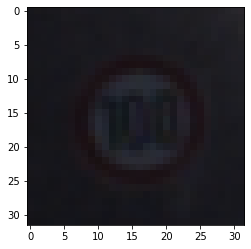

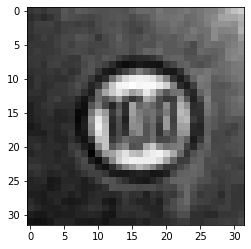

In [19]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_nor[i].squeeze(), cmap = 'gray')

# CNN MODEL

In [2]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
CNN = models.Sequential()


CNN.add(layers.Conv2D(6,(5,5), activation='relu', input_shape=(32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))
CNN.add(layers.Dense(84, activation = 'relu'))

CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

## TRAINING

In [21]:
opt = keras.optimizers.Adam(learning_rate=0.01)
CNN.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = CNN.fit(X_train_gray_nor,
                 y_train,
                 batch_size = 500,
                 epochs = 15,
                 verbose = 1,
                 validation_data = (X_val_gray_nor, y_val))

Train on 34799 samples, validate on 4410 samples
Epoch 1/15
34799/34799 [==============================] - 11s 321us/sample - loss: 2.9817 - accuracy: 0.1949 - val_loss: 1.8333 - val_accuracy: 0.4562
Epoch 2/15
34799/34799 [==============================] - 8s 217us/sample - loss: 1.0674 - accuracy: 0.6740 - val_loss: 0.7314 - val_accuracy: 0.7483
Epoch 3/15
34799/34799 [==============================] - 8s 227us/sample - loss: 0.5866 - accuracy: 0.8207 - val_loss: 0.5363 - val_accuracy: 0.8363
Epoch 4/15
34799/34799 [==============================] - 9s 246us/sample - loss: 0.4025 - accuracy: 0.8777 - val_loss: 0.5061 - val_accuracy: 0.8408
Epoch 5/15
34799/34799 [==============================] - 8s 236us/sample - loss: 0.3033 - accuracy: 0.9089 - val_loss: 0.5152 - val_accuracy: 0.8653
Epoch 6/15
34799/34799 [==============================] - 9s 255us/sample - loss: 0.2404 - accuracy: 0.9258 - val_loss: 0.3716 - val_accuracy: 0.8991
Epoch 7/15
34799/34799 [==========================

## MODEL PERFORMANCE 

In [1]:
score = CNN.evaluate(X_test_gray_nor, y_test)
print('Test Accuracy: {}'.format(score))
# CNN.metrics_names

NameError: name 'CNN' is not defined

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'training and validation loss')

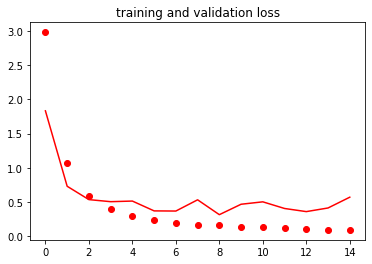

In [27]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title("training and validation loss")

Text(0.5, 1.0, 'training and validation Accuracy')

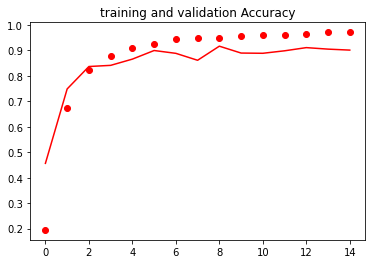

In [28]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label='Training Acc')
plt.plot(epochs, val_accuracy, 'r', label='Validation Acc')
plt.title("training and validation Accuracy")

<AxesSubplot:>

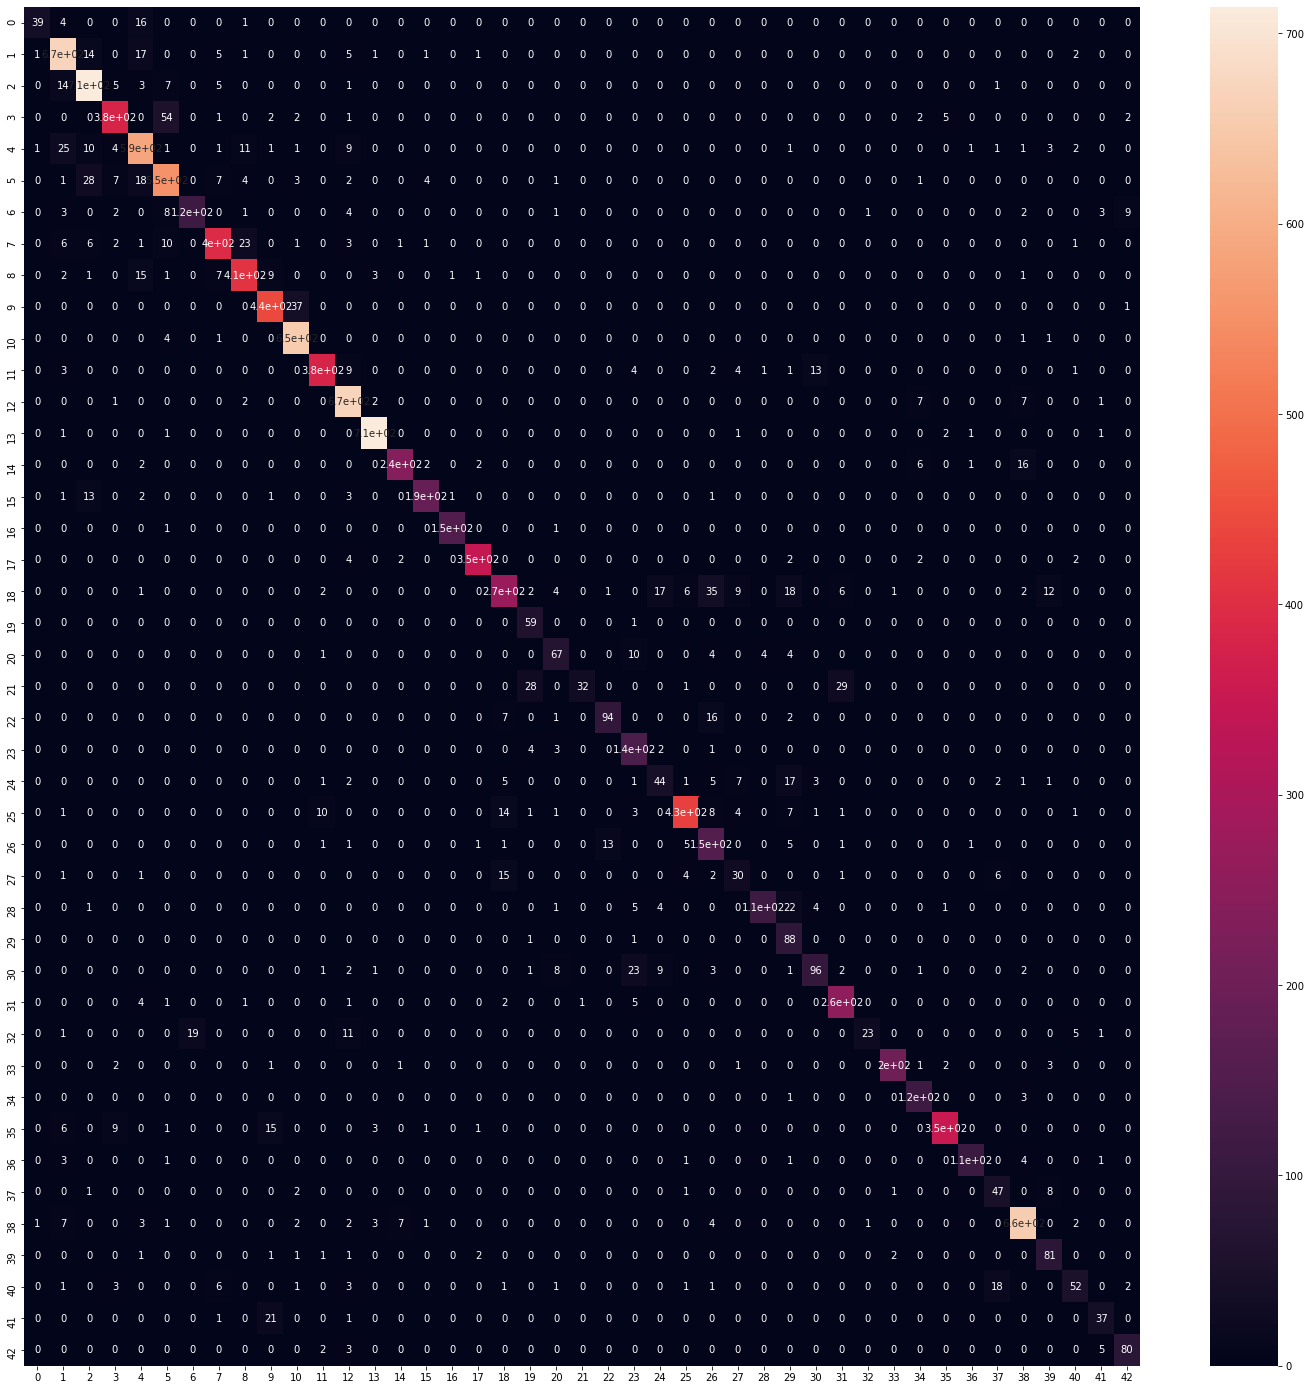

In [30]:
predicted_classes = CNN.predict_classes(X_test_gray_nor)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

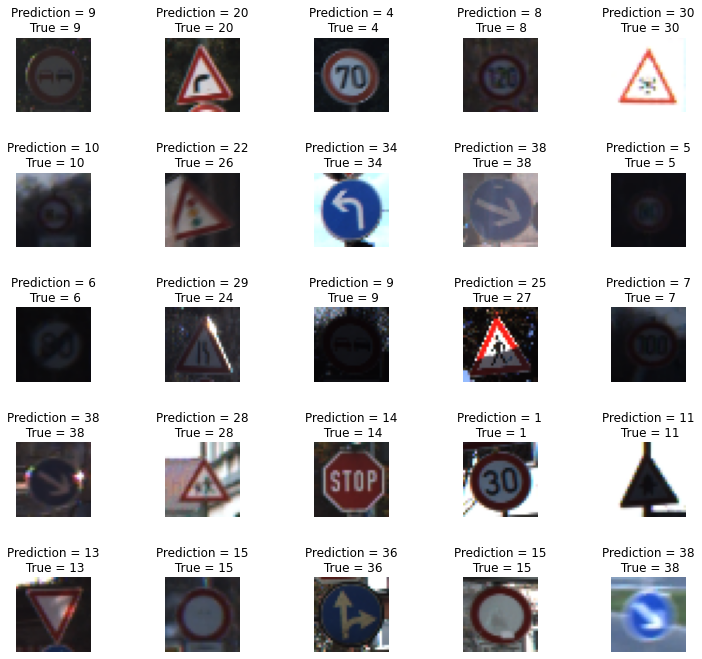

In [32]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    